In [37]:
import pandas as pd 
import os
from IPython.display import Image, display
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from random import randint

In [41]:
def make_flat_lst(lst):
    """ Makes 2D list into 1D list
    """
    lst = list(lst)
    return [x[0] for x in lst]

In [40]:
def random_element(lst):
    """ Returns random list element
    """
    return lst[randint(0,len(lst)-1)]

In [4]:
path = "fc8/"
files = os.listdir(path)

In [5]:
def load_files(path, num = 'all'): 
    """ Returns DataFrame with features after loading each feature file
    """
    files = os.listdir(path)
    lst = []
    if num == 'all':
        f_list = files
    if type(num) is int:
        f_list = files[:num]
    f_list
    for f in f_list:
        f_path = path+"/"+f
        row = make_flat_lst(pd.read_csv(f_path, header = None).values)
        lst.append(row)
    return pd.DataFrame(lst)
# len(lst)

In [6]:
df = load_files(path, 1000)

In [7]:
df.index = files[:1000]

In [11]:
def load_images(path="C:\Users\Latitude E7450\Documents\dev\lab"):
    """ Returns list of images on specified path
    """
    imgs = os.listdir(path)
    imgs = [x for x in imgs if x.endswith(".jpg")]
    return imgs 

40
000040.jpg


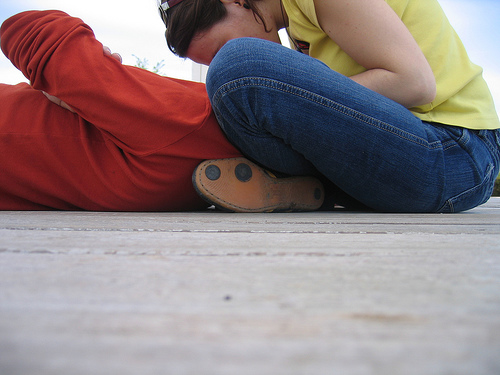

41
000041.jpg


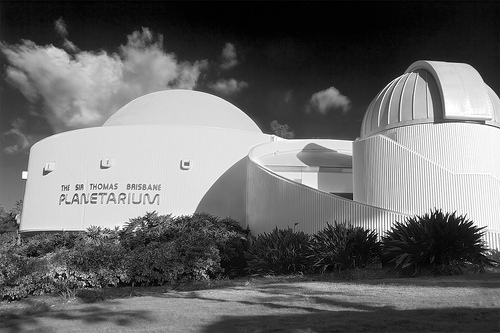

42
000042.jpg


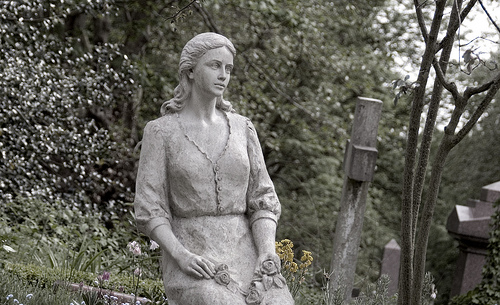

43
000043.jpg


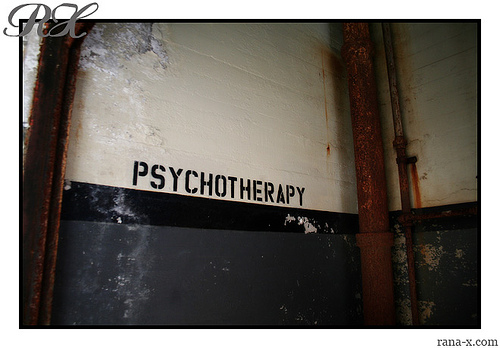

44
000044.jpg


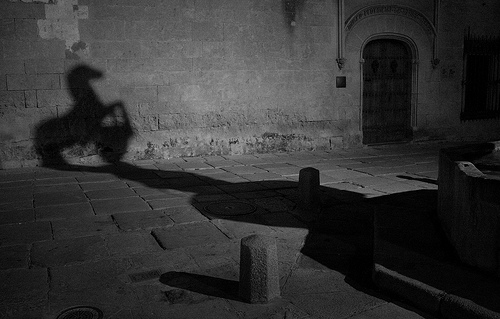

45
000045.jpg


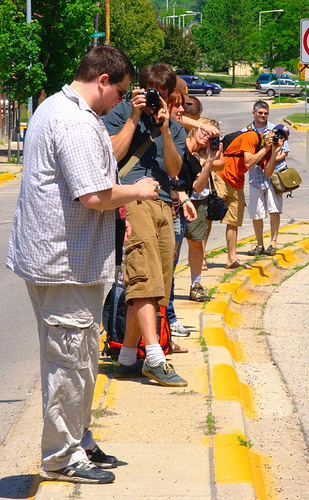

46
000046.jpg


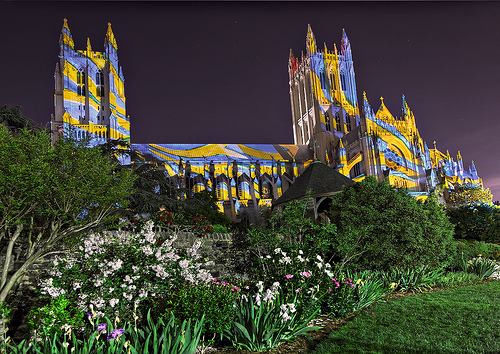

47
000047.jpg


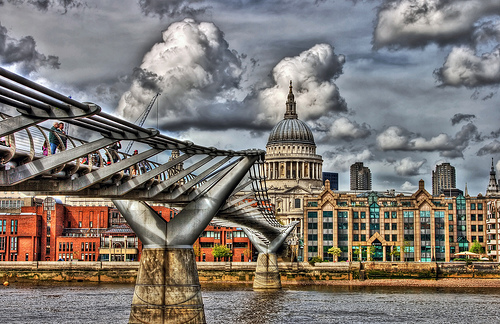

48
000048.jpg


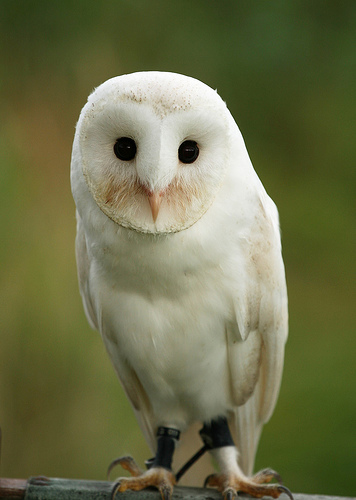

49
000049.jpg


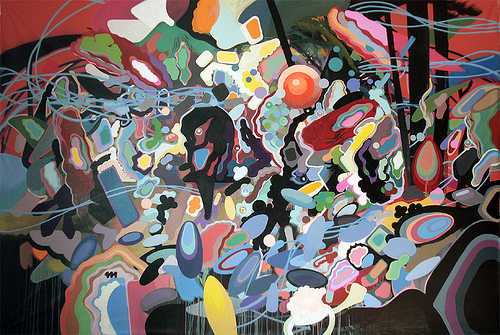

50
000050.jpg


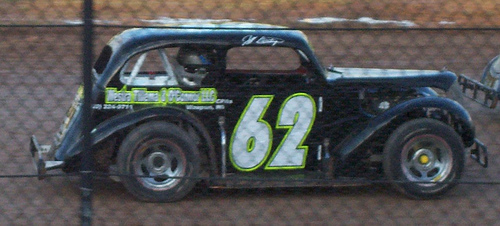

51
000051.jpg


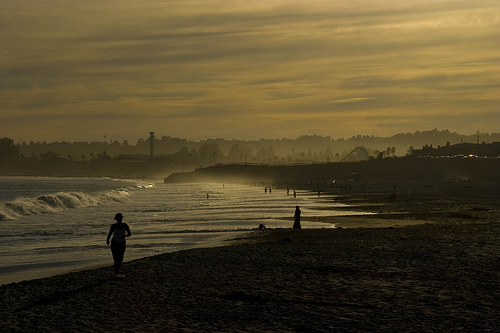

52
000052.jpg


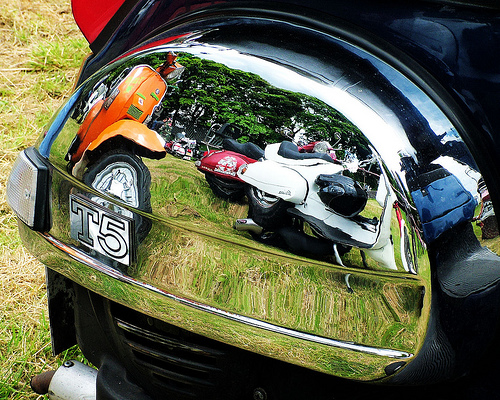

53
000053.jpg


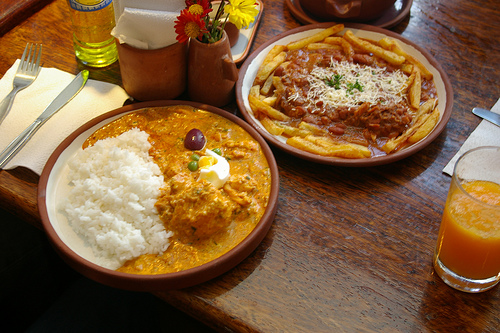

54
000054.jpg


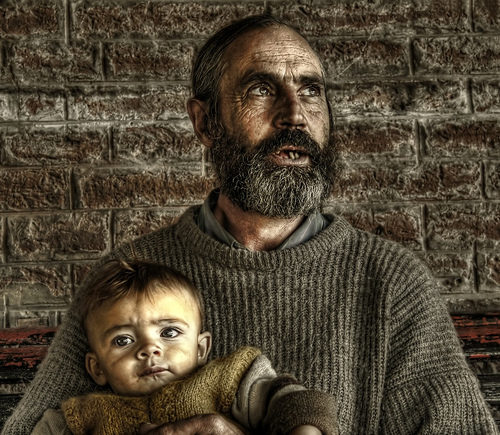

55
000055.jpg


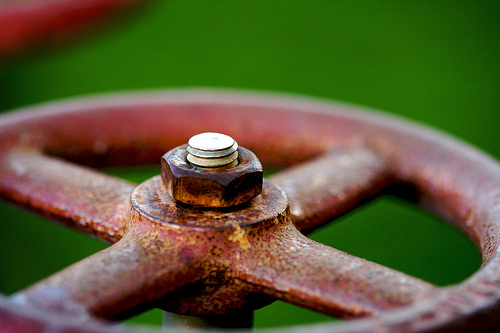

56
000056.jpg


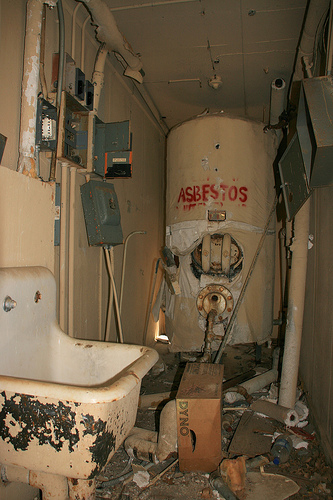

57
000057.jpg


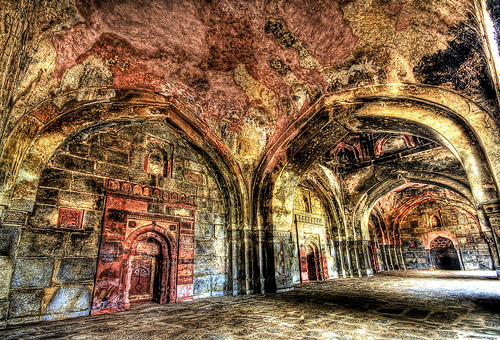

58
000058.jpg


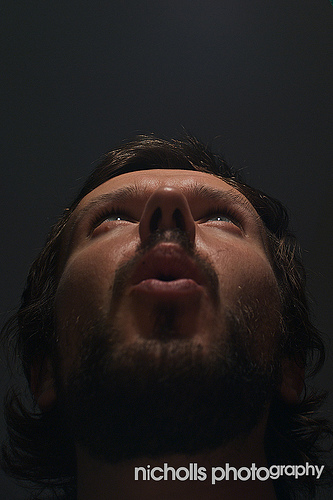

59
000059.jpg


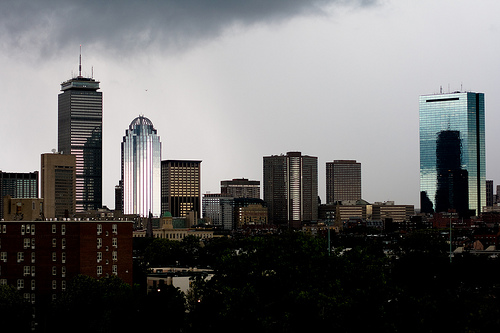

In [12]:
imgs = load_images()
for i in range(40,60):
    print(i)
    print(imgs[i])
    display(Image(imgs[i]))

# Clustering

docs: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

papers: 
* [Supervised K means](http://www.cs.cornell.edu/~tomf/publications/supervised_kmeans-08.pdf) 

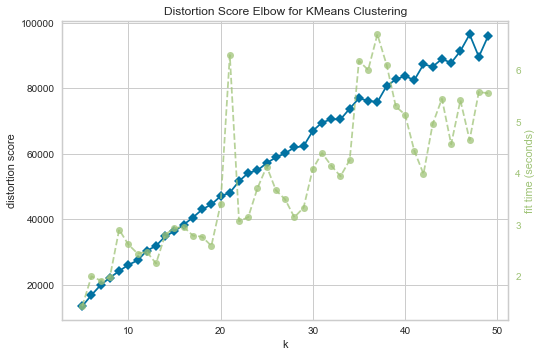

In [25]:
model = KElbowVisualizer(KMeans(), k=(5, 50))
model.fit(df)
model.poof()

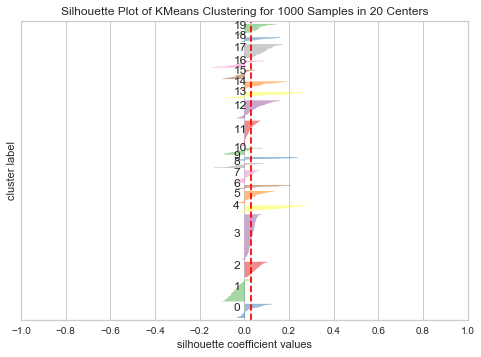

In [30]:
model = KMeans(20)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df)
visualizer.poof()

In [59]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(df)

In [60]:
df_clust = df
df_clust['class'] = kmeans.labels_

In [61]:
def rand_img_from_cluster(df,n):
    """ Returns random image from specified cluster
    """
    clust_x = df_clust[df_clust["class"] == n]
    c_imgs = [x.replace("txt", "jpg") for x in list(clust_x.index.values)]
    return random_element(c_imgs)
#     return c_imgs[0] # just a test

Cluster 1


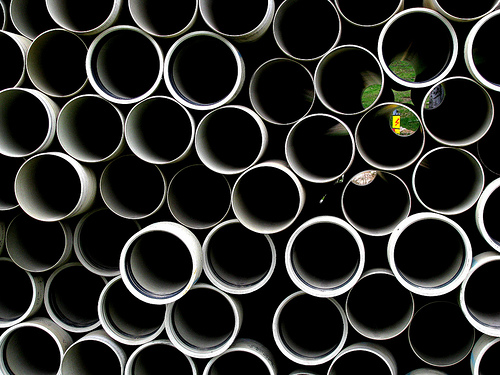

Cluster 2


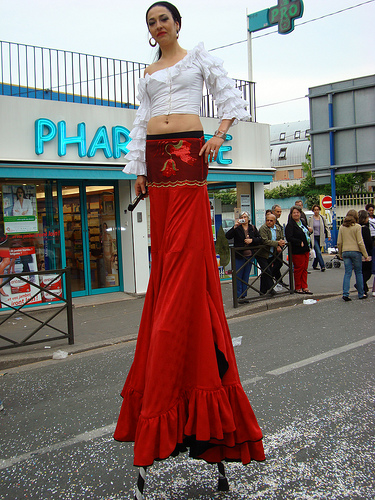

Cluster 3


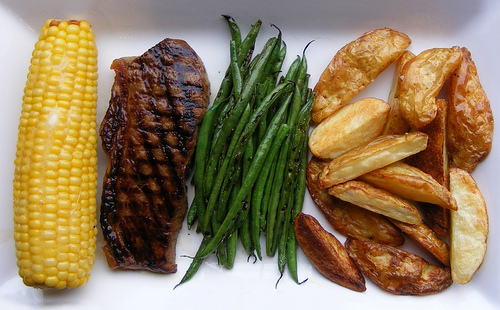

Cluster 4


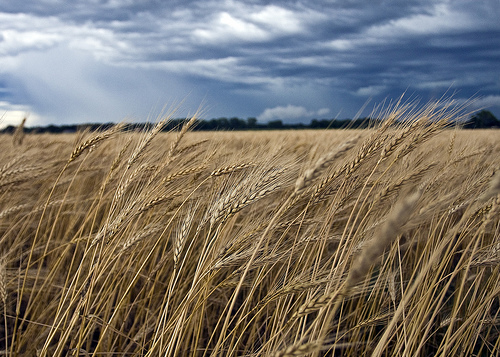

Cluster 5


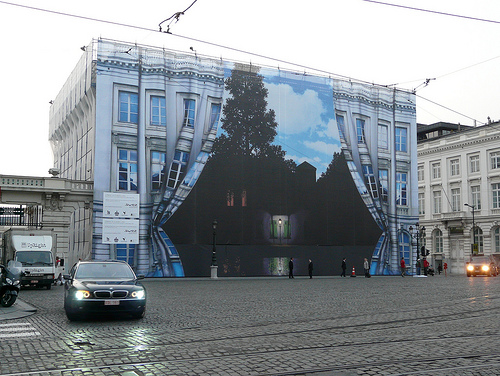

Cluster 6


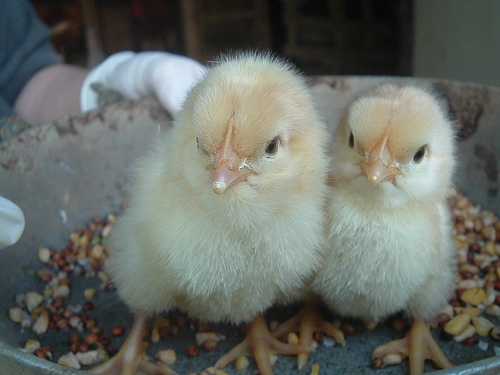

Cluster 7


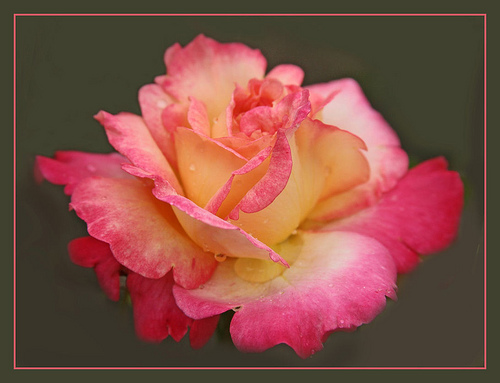

Cluster 8


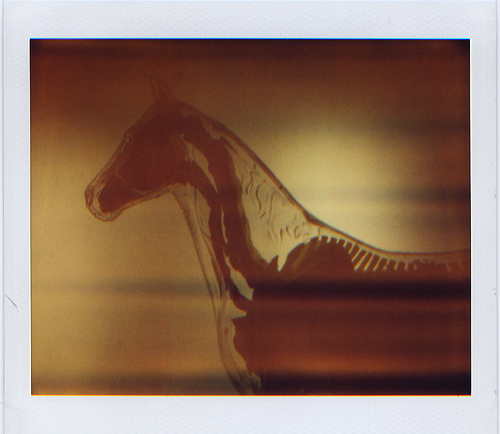

Cluster 9


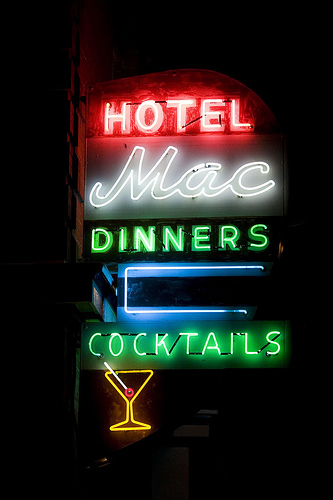

Cluster 10


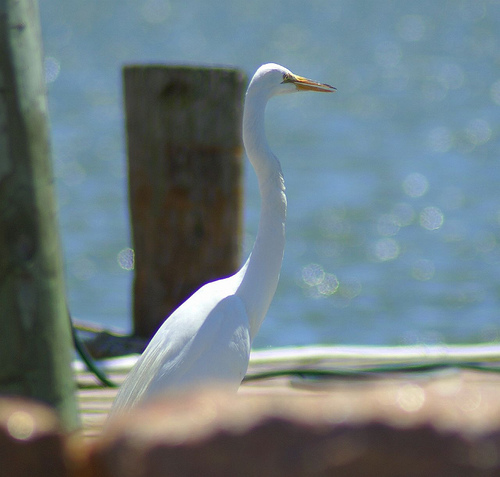

Cluster 11


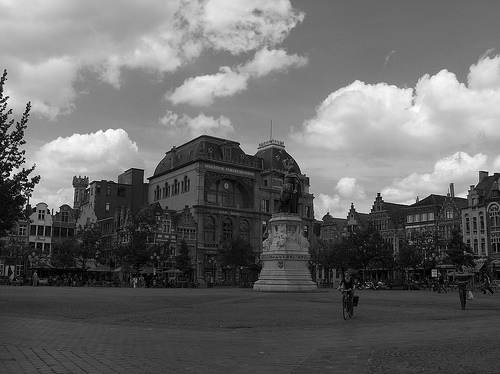

Cluster 12


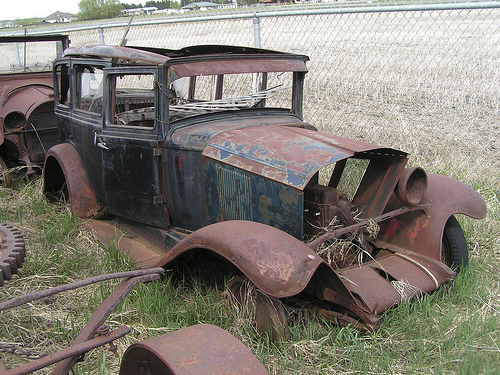

Cluster 13


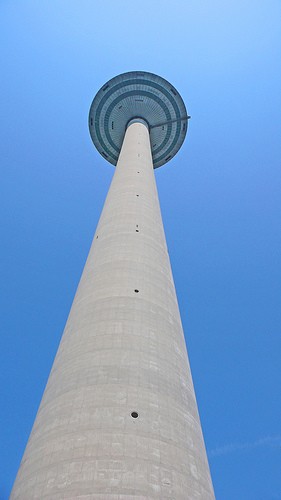

Cluster 14


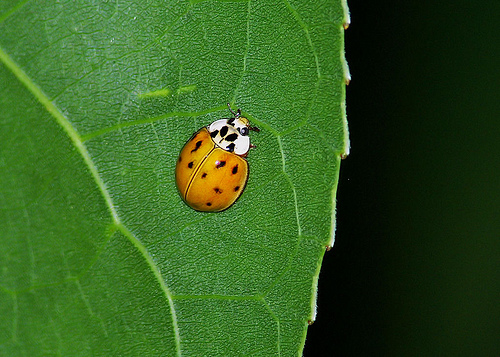

Cluster 15


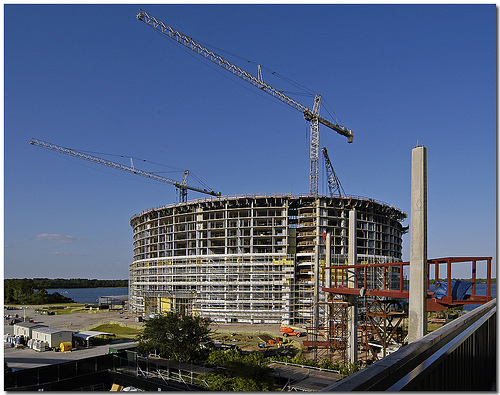

Cluster 16


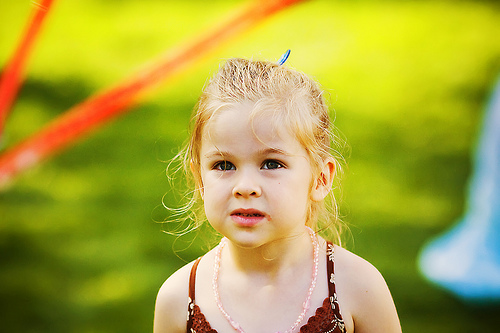

Cluster 17


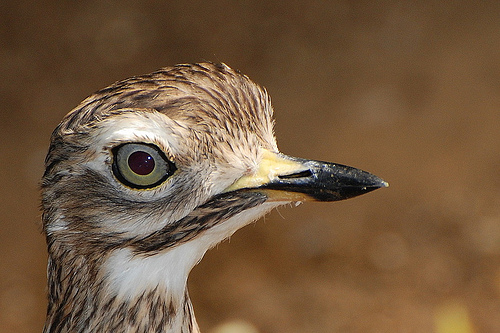

Cluster 18


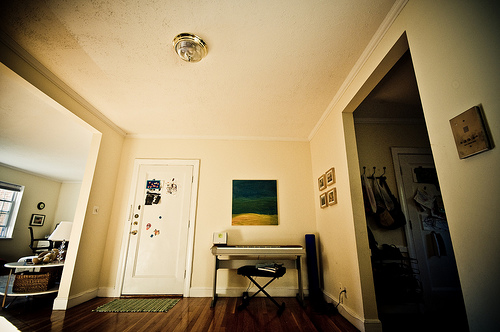

Cluster 19


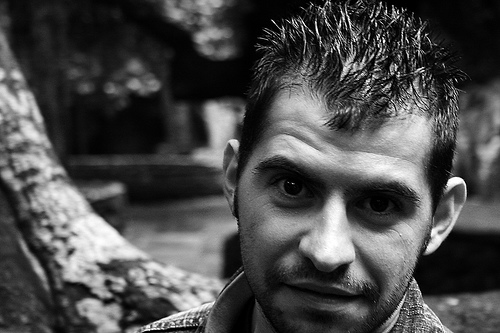

Cluster 20


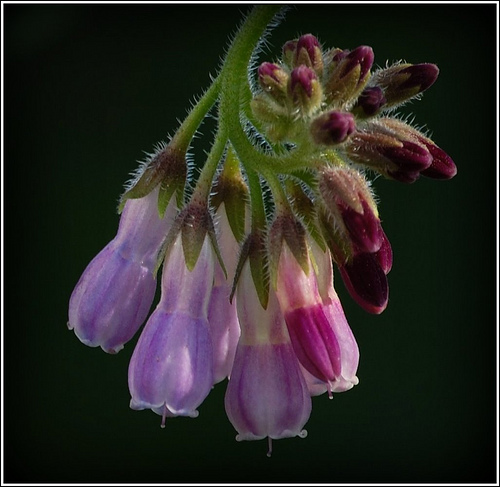

In [66]:
for i in range(0,20):
    print("Cluster "+str(i+1))
    display(Image(rand_img_from_cluster(df, i)))

# Classification